In [2]:
import pandas as pd 
import numpy as np
import matplotlib as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Чистка df
print(df.isnull().values.any())
print(f'df shape with NaN: {df.shape}')
df = df.dropna()
print(f'df shape without NaN: {df.shape}')

True
df shape with NaN: (583, 11)
df shape without NaN: (579, 11)


In [5]:
print(df['Dataset'].value_counts())

1    414
2    165
Name: Dataset, dtype: int64


In [6]:
df = pd.merge(df[df['Dataset'] == 2], df[df['Dataset'] == 1].sample(n=165), how='outer')
print(df['Dataset'].value_counts())

1    165
2    165
Name: Dataset, dtype: int64


In [7]:
# Корреляция
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.086161,0.097275,0.050281,-0.045600,0.034828,-0.193750,-0.249239,-0.178570,-0.150297
Total_Bilirubin,0.086161,1.000000,0.963928,0.397677,0.288004,0.270412,-0.014006,-0.266323,-0.304114,-0.328672
Direct_Bilirubin,0.097275,0.963928,1.000000,0.383930,0.263567,0.248506,-0.001073,-0.252894,-0.297947,-0.342549
Alkaline_Phosphotase,0.050281,0.397677,0.383930,1.000000,0.281644,0.333266,-0.086855,-0.212626,-0.275961,-0.208130
Alamine_Aminotransferase,-0.045600,0.288004,0.263567,0.281644,1.000000,0.733230,0.011960,-0.021745,-0.037253,-0.214995
Aspartate_Aminotransferase,0.034828,0.270412,0.248506,0.333266,0.733230,1.000000,0.009130,-0.086838,-0.098230,-0.166204
Total_Protiens,-0.193750,-0.014006,-0.001073,-0.086855,0.011960,0.009130,1.000000,0.803812,0.264797,0.071336
Albumin,-0.249239,-0.266323,-0.252894,-0.212626,-0.021745,-0.086838,0.803812,1.000000,0.709573,0.216799
Albumin_and_Globulin_Ratio,-0.178570,-0.304114,-0.297947,-0.275961,-0.037253,-0.098230,0.264797,0.709573,1.000000,0.223115
Dataset,-0.150297,-0.328672,-0.342549,-0.208130,-0.214995,-0.166204,0.071336,0.216799,0.223115,1.000000


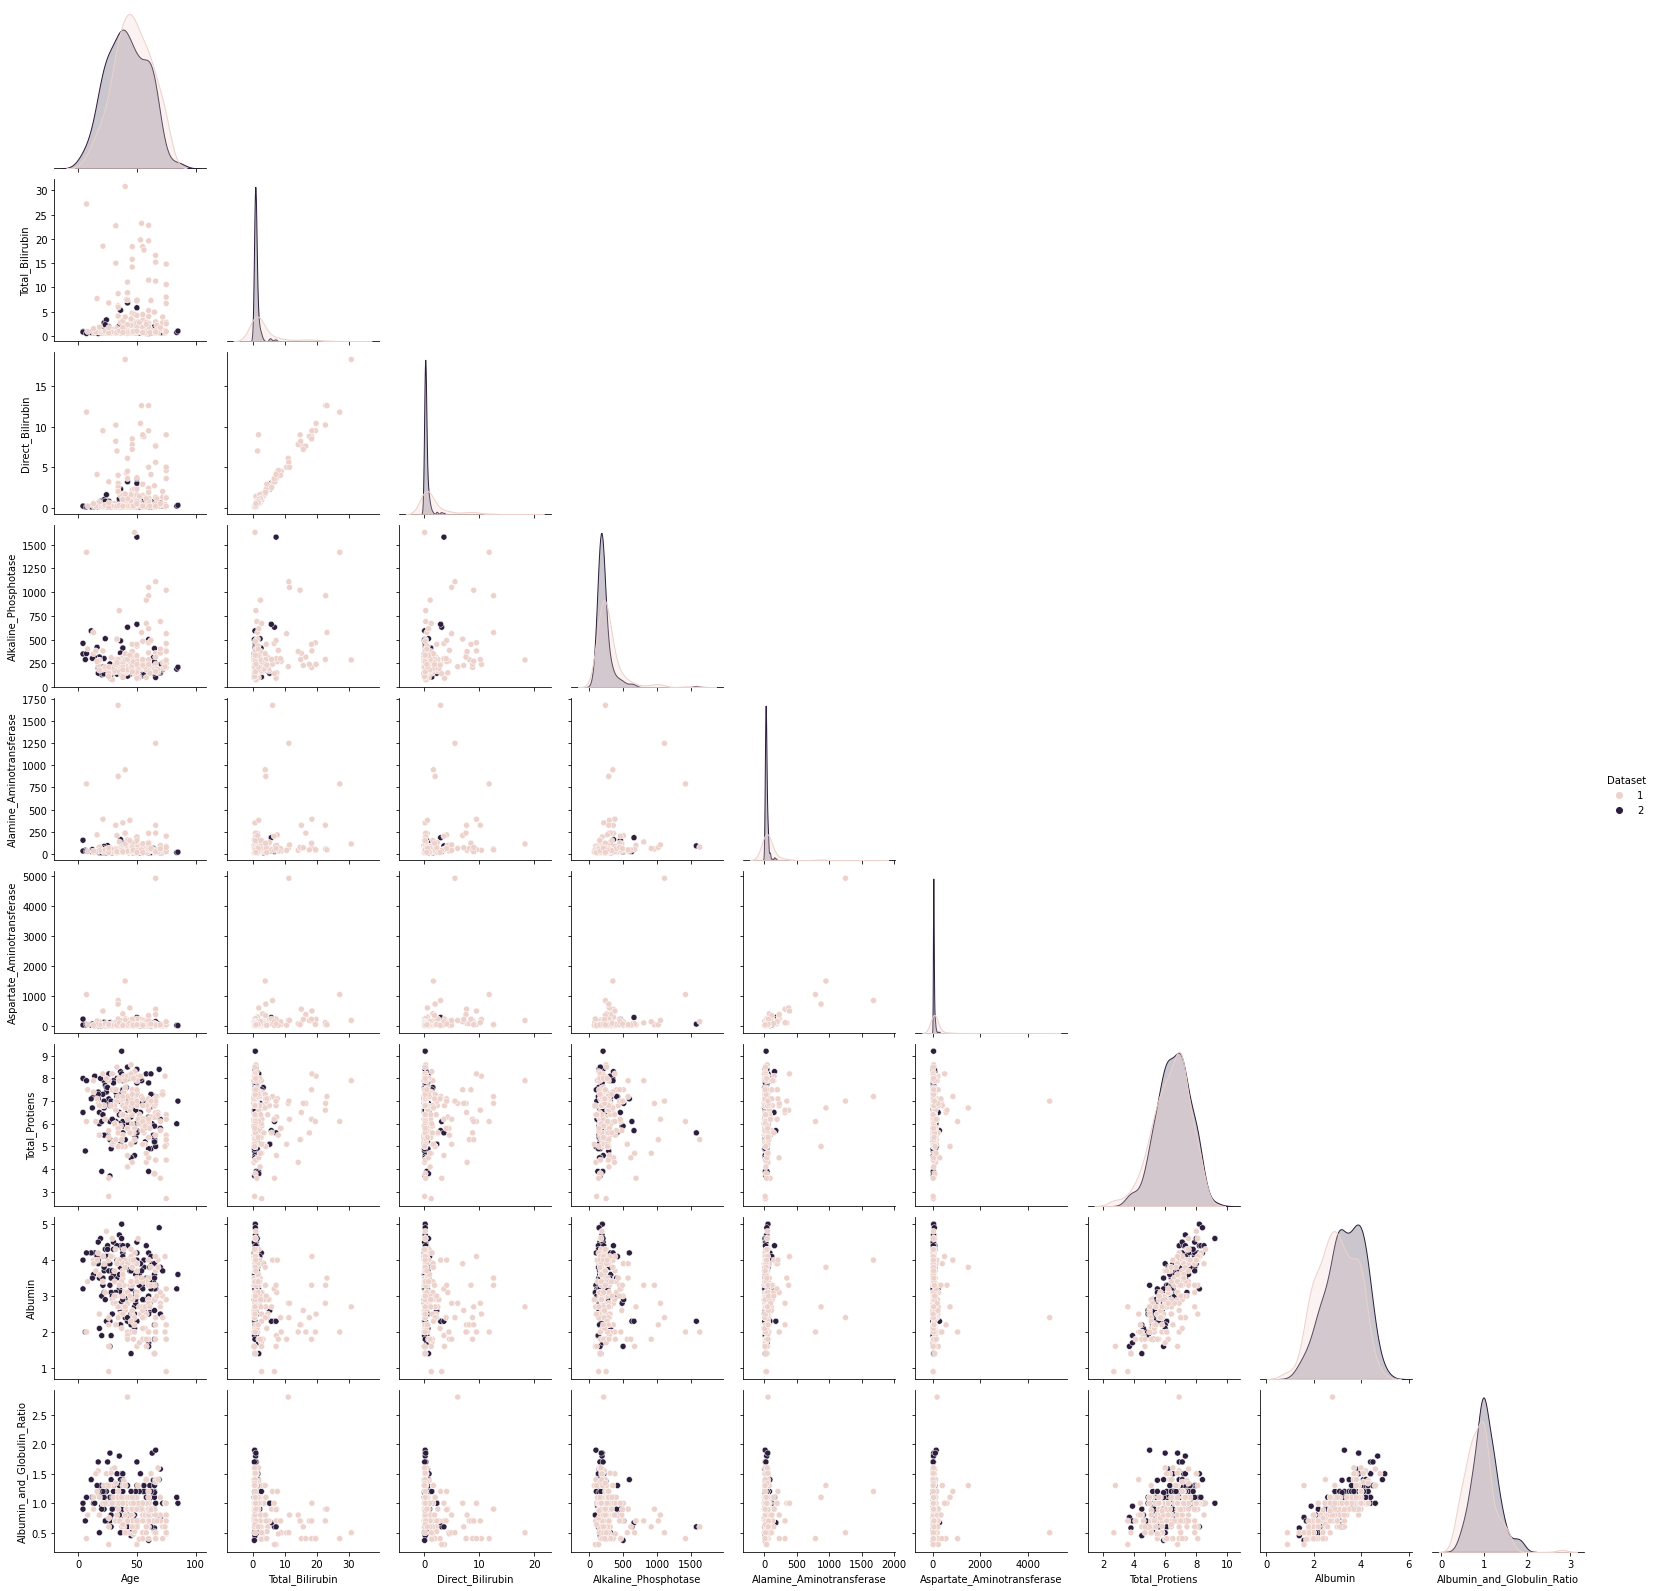

In [8]:
# Вывод составного графика
sns.pairplot(df, hue='Dataset', corner = True)

In [458]:
df.keys()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

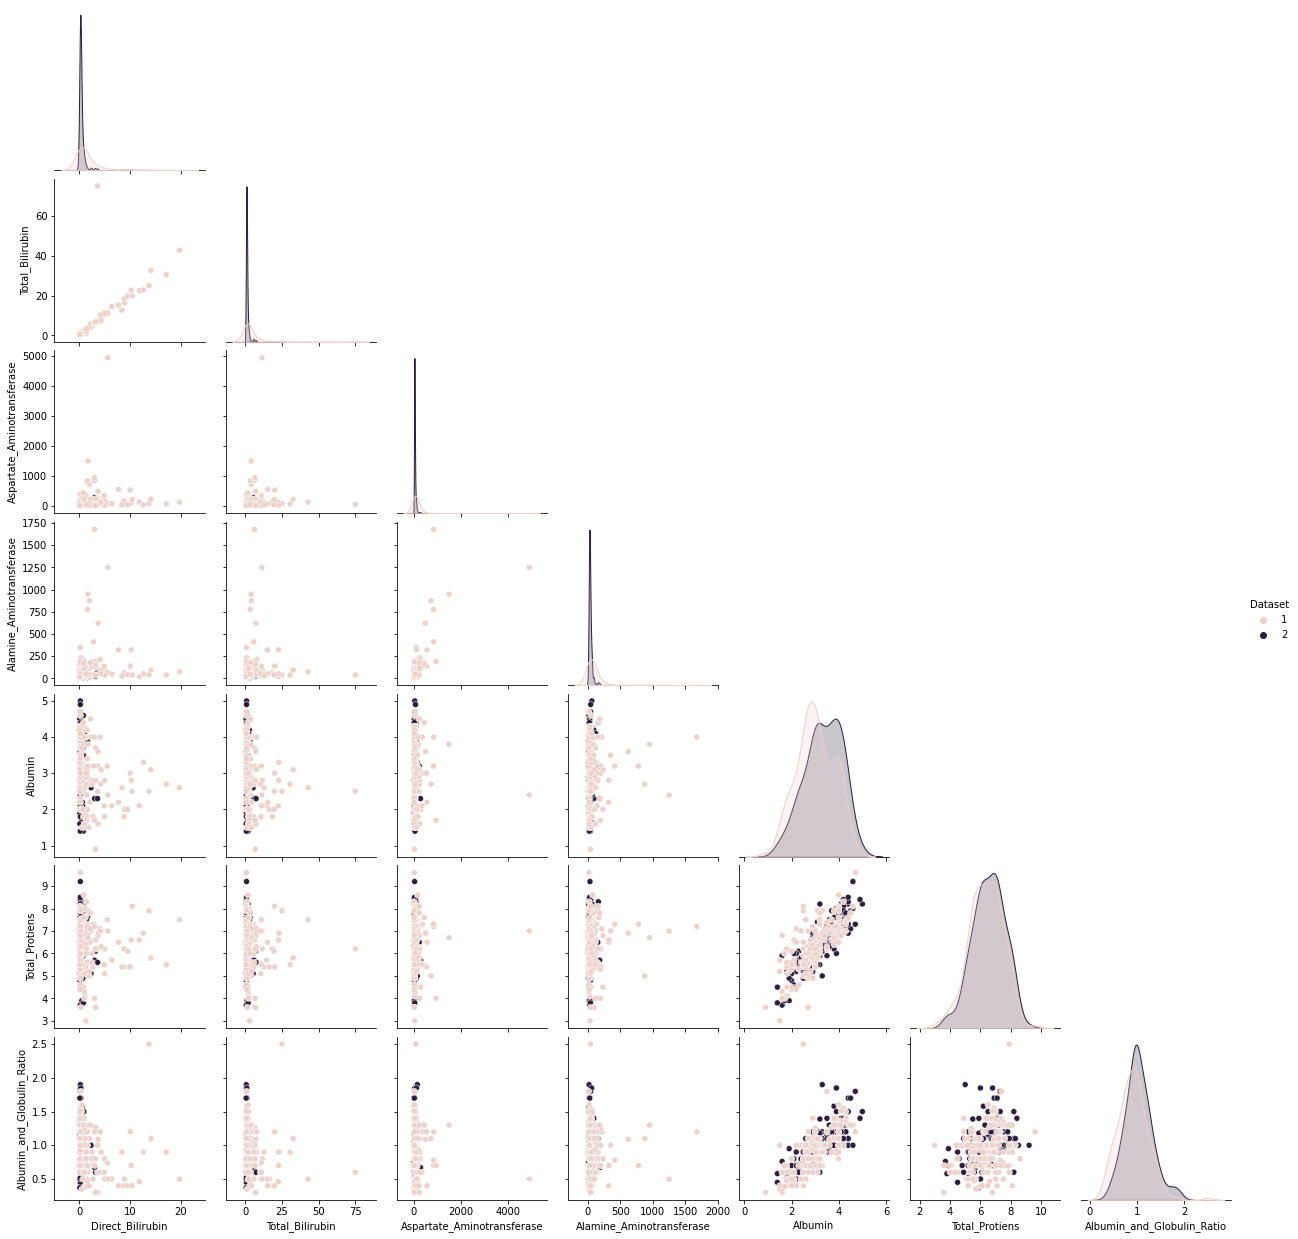

In [459]:
collist = ['Direct_Bilirubin', 'Total_Bilirubin', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Albumin'\
           , 'Total_Protiens', 'Albumin_and_Globulin_Ratio', 'Dataset']
sns.pairplot(df[collist], hue='Dataset', corner = True)

In [460]:
collist = ['Direct_Bilirubin', 'Total_Bilirubin', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Albumin'\
           , 'Total_Protiens', 'Albumin_and_Globulin_Ratio']
x_train, x_test, y_train, y_test = train_test_split(df[collist].values, 
                                                    df['Dataset'],
                                                    random_state=0)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (247, 7), y_train shape: (247,),
X_test shape: (83, 7), y_test shape: (83,)


In [461]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [462]:
knn_model = knn.fit(x_train, y_train)

In [463]:
knn_predictions = knn_model.predict(x_test)
knn_predictions

array([2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1], dtype=int64)

In [465]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5662650602409639


In [466]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

C:\Users\1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [467]:
clf_predictions = clf.predict(x_test)
clf_predictions

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1], dtype=int64)

In [468]:
accuracy = accuracy_score(y_test, clf_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6626506024096386


In [469]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(x_train, y_train)

In [470]:
mnb_predictions = mnb.predict(x_test)
mnb_predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1], dtype=int64)

In [471]:
accuracy = accuracy_score(y_test, mnb_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6626506024096386


In [472]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(x_train, y_train)

In [473]:
classifier_predictions = classifier.predict(x_test)
classifier_predictions

array([1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1], dtype=int64)

In [474]:
accuracy = accuracy_score(y_test, classifier_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6626506024096386
